In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv("sales_data_sample.csv",encoding = 'unicode_escape')

In [3]:
df.shape

(2823, 25)

In [4]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [6]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [7]:
df=df.drop(['PHONE','ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','POSTALCODE','TERRITORY','CONTACTLASTNAME','CONTACTFIRSTNAME','CUSTOMERNAME','ORDERNUMBER','QTR_ID','ORDERDATE'],axis=1)
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,Shipped,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,Shipped,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,Shipped,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,Shipped,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,Shipped,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [8]:
df.nunique() #Checking unique values.

QUANTITYORDERED      58
PRICEEACH          1016
ORDERLINENUMBER      18
SALES              2763
STATUS                6
MONTH_ID             12
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
PRODUCTCODE         109
COUNTRY              19
DEALSIZE              3
dtype: int64

In [9]:
#Encodning Categorical Variables for easier processing.
status_dict = {'Shipped':1, 'Cancelled':2, 'On Hold':2, 'Disputed':2, 'In Process':0, 'Resolved':0}
df['STATUS'].replace(status_dict, inplace=True)
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes
df = pd.get_dummies(data=df, columns=['PRODUCTLINE', 'DEALSIZE', 'COUNTRY'])
df.dtypes

QUANTITYORDERED                   int64
PRICEEACH                       float64
ORDERLINENUMBER                   int64
SALES                           float64
STATUS                            int64
MONTH_ID                          int64
YEAR_ID                           int64
MSRP                              int64
PRODUCTCODE                        int8
PRODUCTLINE_Classic Cars          uint8
PRODUCTLINE_Motorcycles           uint8
PRODUCTLINE_Planes                uint8
PRODUCTLINE_Ships                 uint8
PRODUCTLINE_Trains                uint8
PRODUCTLINE_Trucks and Buses      uint8
PRODUCTLINE_Vintage Cars          uint8
DEALSIZE_Large                    uint8
DEALSIZE_Medium                   uint8
DEALSIZE_Small                    uint8
COUNTRY_Australia                 uint8
COUNTRY_Austria                   uint8
COUNTRY_Belgium                   uint8
COUNTRY_Canada                    uint8
COUNTRY_Denmark                   uint8
COUNTRY_Finland                   uint8


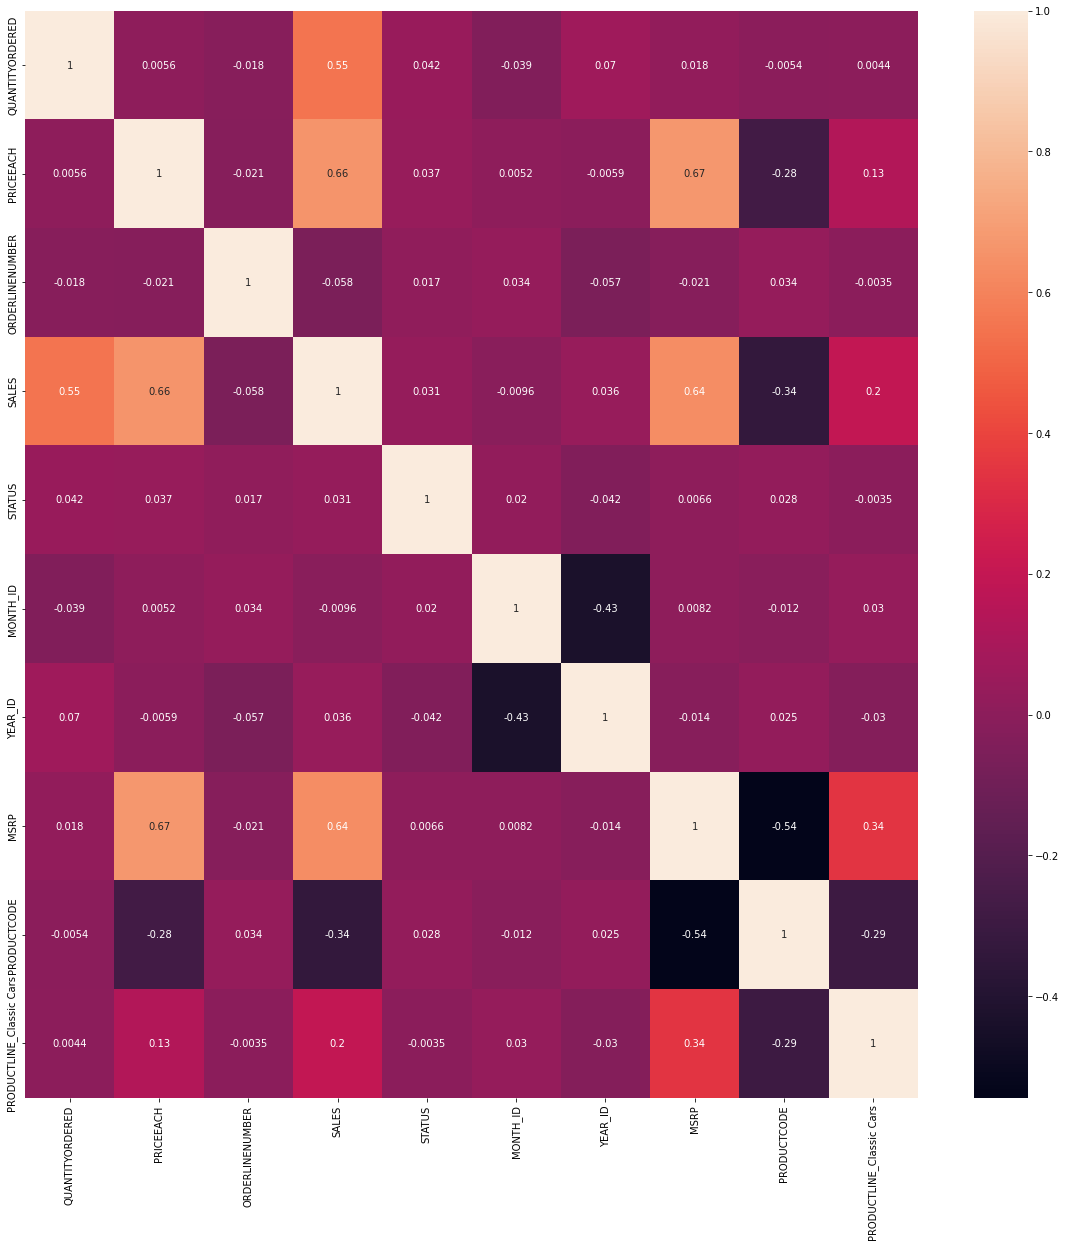

In [10]:
plt.figure(figsize = (20, 20))
corr_matrix = df.iloc[:, :10].corr()
sns.heatmap(corr_matrix, annot=True);

In [11]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(df)

In [12]:
km=KMeans(n_clusters=3,random_state=1)
km.fit(x_scaled)
clusters_lables=km.labels_
df=df.assign(clusters=clusters_lables)
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,PRODUCTLINE_Classic Cars,...,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,clusters
0,30,95.70,2,2871.00,1,2,2003,95,0,0,...,0,0,0,0,0,0,0,0,1,2
1,34,81.35,5,2765.90,1,5,2003,95,0,0,...,0,0,0,0,0,0,0,0,0,2
2,41,94.74,2,3884.34,1,7,2003,95,0,0,...,0,0,0,0,0,0,0,0,0,1
3,45,83.26,6,3746.70,1,8,2003,95,0,0,...,0,0,0,0,0,0,0,0,1,1
4,49,100.00,14,5205.27,1,10,2003,95,0,0,...,0,0,0,0,0,0,0,0,1,1


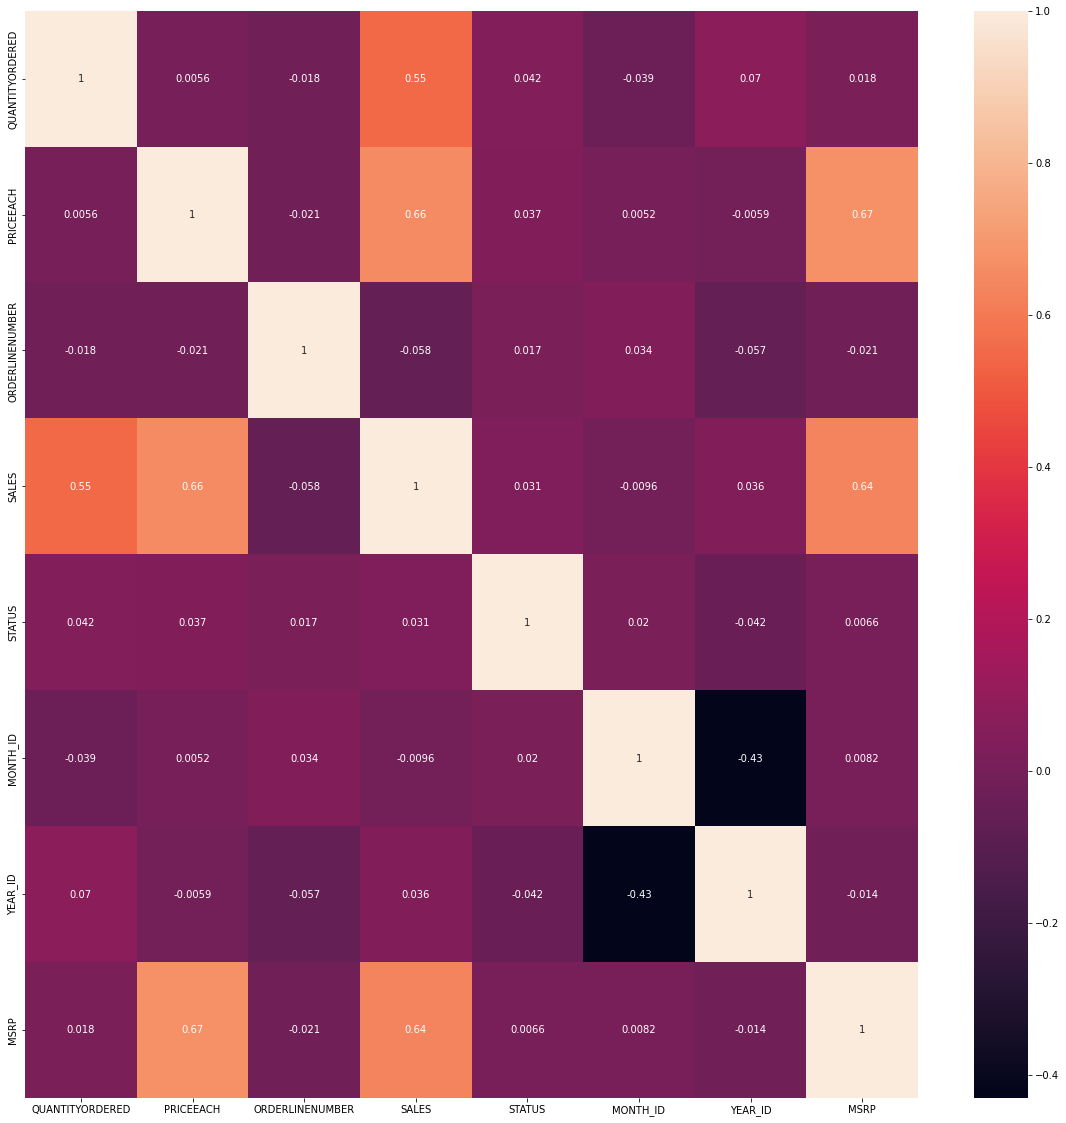

In [13]:
#Heatmap after Kmeans clustering
plt.figure(figsize = (20, 20))

corr_matrix = df.iloc[:, :8].corr()
sns.heatmap(corr_matrix, annot=True);